<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

# Librerías

Cargando las bibliotecas que necesitamos 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1:  Datos de la estación meteorologica de Progreso, Yucatán

Fuente:  https://smn.conagua.gob.mx/es/observando-el-tiempo/estaciones-meteorologicas-automaticas-ema-s

In [3]:
df= pd.read_csv("datos/Estacion_PROGRESO_90_dias_19Nov.csv")
df.head(5)

,FechaLocal,FechaUTC,TemperaturaAire(C),Precipitacion(mm),HumedadRelativa(%),PresionAtmosferica(hpa),RadiacionSolar(W/m2),DireccionViento(grados),RapidezViento(km/h),DireccionRafaga(grados),RapidezRafaga(km/h)
0,19/11/2020 15:20,19/11/2020 21:20,28,0,72,1017.0,226.0,59.0,28.0,115.0,46.0
1,19/11/2020 15:10,19/11/2020 21:10,28,0,73,1017.0,445.0,59.0,27.0,103.0,43.0
2,19/11/2020 15:00,19/11/2020 21:00,28,0,74,1017.0,475.0,60.0,28.0,97.0,53.0
3,19/11/2020 14:50,19/11/2020 20:50,28,0,75,1017.0,359.0,59.0,27.0,94.0,51.0
4,19/11/2020 14:40,19/11/2020 20:40,28,0,74,1017.0,550.0,63.0,27.0,99.0,48.0


<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Configurar la columna de 'FechaLocal' como índice temporal  </li>
</ul>
</div>

In [4]:
df['FechaLocal'] = pd.to_datetime(df['FechaLocal'], format= '%d/%m/%Y %H:%M')

In [5]:
df = df.set_index('FechaLocal')

In [6]:
df.head()

,FechaUTC,TemperaturaAire(C),Precipitacion(mm),HumedadRelativa(%),PresionAtmosferica(hpa),RadiacionSolar(W/m2),DireccionViento(grados),RapidezViento(km/h),DireccionRafaga(grados),RapidezRafaga(km/h)
FechaLocal,,,,,,,,,,
2020-11-19 15:20:00,19/11/2020 21:20,28,0,72,1017.0,226.0,59.0,28.0,115.0,46.0
2020-11-19 15:10:00,19/11/2020 21:10,28,0,73,1017.0,445.0,59.0,27.0,103.0,43.0
2020-11-19 15:00:00,19/11/2020 21:00,28,0,74,1017.0,475.0,60.0,28.0,97.0,53.0
2020-11-19 14:50:00,19/11/2020 20:50,28,0,75,1017.0,359.0,59.0,27.0,94.0,51.0
2020-11-19 14:40:00,19/11/2020 20:40,28,0,74,1017.0,550.0,63.0,27.0,99.0,48.0


<div class="alert alert-success">
    
a). Graficar la Precipitación total por día, semana y mes (graficas separadas)
    
</div> 

<AxesSubplot:xlabel='FechaLocal'>

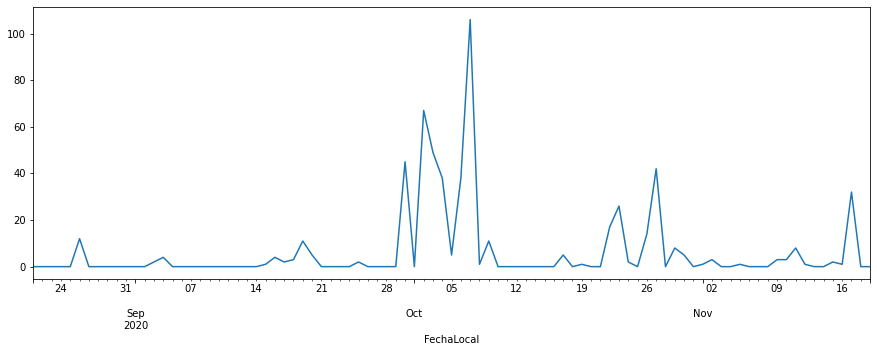

In [7]:

df['Precipitacion(mm)'].resample('D').sum().plot(figsize=(15,5))

<AxesSubplot:xlabel='FechaLocal'>

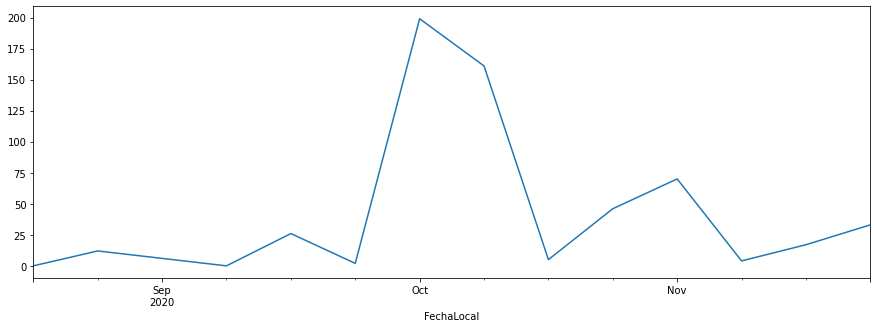

In [8]:
df['Precipitacion(mm)'].resample('W').sum().plot(figsize=(15,5))

<AxesSubplot:xlabel='FechaLocal'>

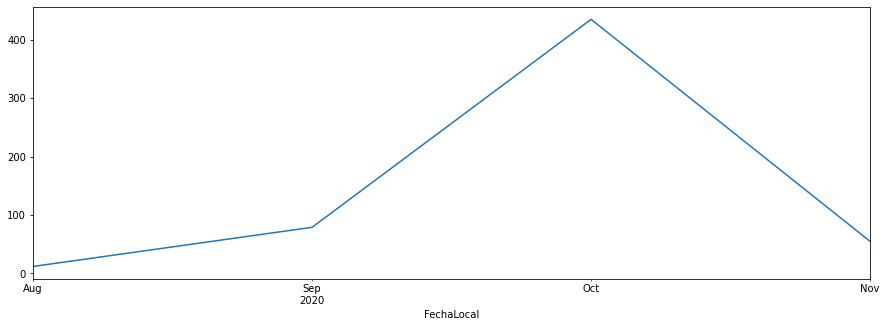

In [9]:
df['Precipitacion(mm)'].resample('M').sum().plot(figsize=(15,5))

<div class="alert alert-success">
    
b). En una misma grafica muestre la media, el valor mínimo y el máximo de la temperatura del aire
    
</div> 

<AxesSubplot:xlabel='FechaLocal'>

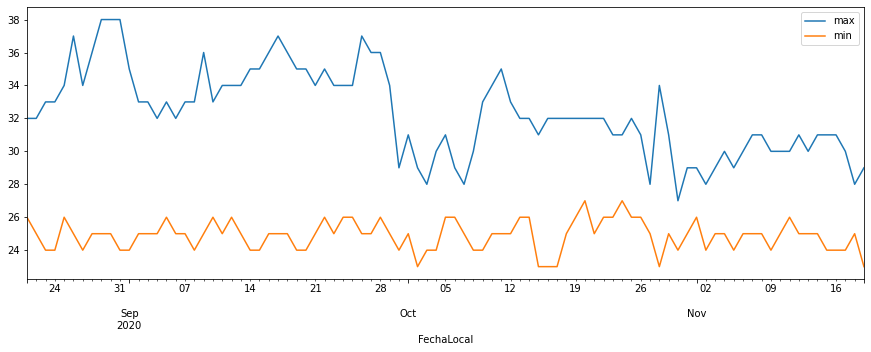

In [10]:
#df['TemperaturaAire(C)'].plot(style=[':', '--', '-'],figsize=(15,5))
df.loc[:]['TemperaturaAire(C)'].resample('D').agg(['max','min']).plot(figsize=(15,5))

<div class="alert alert-success">
    
c). Encontrar el día que en suma recibió mayor radiación solar; con este día haga una grafica con el parámetro de la mediana para cada 30 minutos.
    
</div> 

In [11]:
#df['RadiacionSolar(W/m2)'].plot(style=[':', '--', '-'],figsize=(15,5))
#df.sort_values(['RadiacionSolar(W/m2)'])['RadiacionSolar(W/m2)'].resample('30T').mean().plot(figsize=(15,5))

In [12]:
df.sort_values(['RadiacionSolar(W/m2)']).index[-1]

Timestamp('2020-08-21 19:40:00')

<AxesSubplot:xlabel='FechaLocal'>

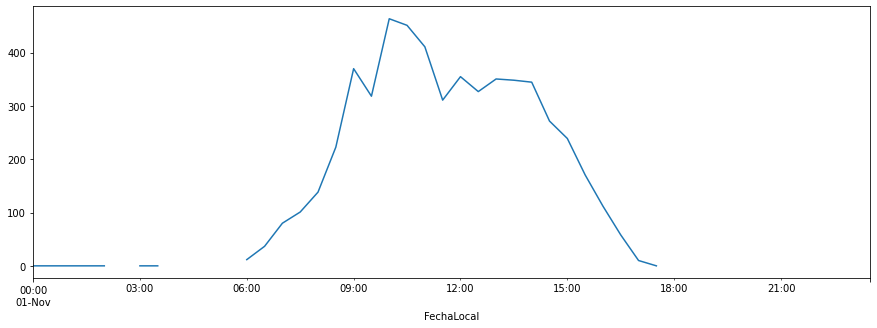

In [13]:
df['RadiacionSolar(W/m2)'].loc['2020-11-1'].resample('30T').mean().plot(figsize=(15,5))

<AxesSubplot:xlabel='FechaLocal'>

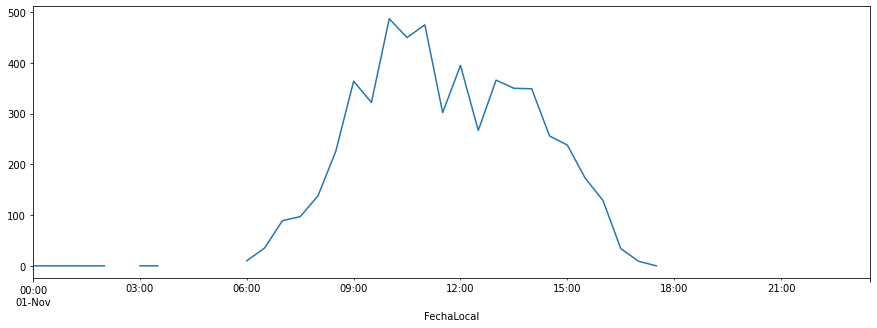

In [14]:
df['RadiacionSolar(W/m2)'].loc['2020-11-1'].resample('30T').median().plot(figsize=(15,5))

# Ejercicio 2: Incendios en México

In [15]:
df= pd.read_csv("datos/Serie_historica_anual_incendios_2017.csv")
df.head(5)

,Número de Incendio,Clave del incendio,Grados,Minutos,Segundos,Grados.1,Minutos.1,Segundos.1,Clave municipio,Estado,...,Tamaño,Deteccion,Llegada,Duracion HMS,Duracion H,Costos MXN,Superficie Salvada,CO2 emitido,CO2 Evito emitir,Region
0,922,17-15-0922,19,26,45.7,98,46,23.0,99,México,...,Mayor a 100 Hectáreas,00:00:00,00:00:00,00:00:00,0.0,118726.00,39095.73,70852.06,1398996.49,Centro
1,33,17-23-0033,21,12,21.8,86,59,57.3,5,Quintana Roo,...,21 a 50 Hectáreas,36:00:00,00:30:00,00:00:00,0.0,55493.82,768.50,1457.05,22208.31,Sureste
2,298,17-07-0298,16,25,53.1,93,56,38.5,17,Chiapas,...,Mayor a 100 Hectáreas,00:30:00,00:30:00,00:00:00,0.0,49565.00,1981.46,6920.70,105485.34,Sureste
3,36,17-23-0036,19,14,47.3,88,19,24.5,2,Quintana Roo,...,51 a 100 Hectáreas,01:00:00,10:45:00,00:00:00,0.0,47800.52,1084.77,0.00,0.00,Sureste
4,160,17-20-0160,16,36,4.0,97,44,6.0,377,Oaxaca,...,Mayor a 100 Hectáreas,02:00:00,07:00:00,00:00:00,0.0,42600.00,7697.21,18070.85,275435.96,Centro


<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Configurar la columna de 'Fecha Inicio' como índice temporal desde el inicio de su lectura </li>
</ul>
</div>

In [16]:
#  'Fecha Inicio' tiene índice 13
df = pd.read_csv("datos/Serie_historica_anual_incendios_2017.csv", index_col=13, parse_dates=True)
df.head()

C:\Users\flore\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/04/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\flore\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '29/04/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\flore\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '17/04/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\flore\AppData\Local\Programs\Python\Python39\lib\site-packages\p

,Número de Incendio,Clave del incendio,Grados,Minutos,Segundos,Grados.1,Minutos.1,Segundos.1,Clave municipio,Estado,...,Tamaño,Deteccion,Llegada,Duracion HMS,Duracion H,Costos MXN,Superficie Salvada,CO2 emitido,CO2 Evito emitir,Region
Fecha Inicio,,,,,,,,,,,,,,,,,,,,,
2017-01-04,922,17-15-0922,19,26,45.7,98,46,23.0,99,México,...,Mayor a 100 Hectáreas,00:00:00,00:00:00,00:00:00,0.0,118726.00,39095.73,70852.06,1398996.49,Centro
2017-04-15,33,17-23-0033,21,12,21.8,86,59,57.3,5,Quintana Roo,...,21 a 50 Hectáreas,36:00:00,00:30:00,00:00:00,0.0,55493.82,768.50,1457.05,22208.31,Sureste
2017-04-29,298,17-07-0298,16,25,53.1,93,56,38.5,17,Chiapas,...,Mayor a 100 Hectáreas,00:30:00,00:30:00,00:00:00,0.0,49565.00,1981.46,6920.70,105485.34,Sureste
2017-04-17,36,17-23-0036,19,14,47.3,88,19,24.5,2,Quintana Roo,...,51 a 100 Hectáreas,01:00:00,10:45:00,00:00:00,0.0,47800.52,1084.77,0.00,0.00,Sureste
2017-01-04,160,17-20-0160,16,36,4.0,97,44,6.0,377,Oaxaca,...,Mayor a 100 Hectáreas,02:00:00,07:00:00,00:00:00,0.0,42600.00,7697.21,18070.85,275435.96,Centro


In [17]:
df.head()

,Número de Incendio,Clave del incendio,Grados,Minutos,Segundos,Grados.1,Minutos.1,Segundos.1,Clave municipio,Estado,...,Tamaño,Deteccion,Llegada,Duracion HMS,Duracion H,Costos MXN,Superficie Salvada,CO2 emitido,CO2 Evito emitir,Region
Fecha Inicio,,,,,,,,,,,,,,,,,,,,,
2017-01-04,922,17-15-0922,19,26,45.7,98,46,23.0,99,México,...,Mayor a 100 Hectáreas,00:00:00,00:00:00,00:00:00,0.0,118726.00,39095.73,70852.06,1398996.49,Centro
2017-04-15,33,17-23-0033,21,12,21.8,86,59,57.3,5,Quintana Roo,...,21 a 50 Hectáreas,36:00:00,00:30:00,00:00:00,0.0,55493.82,768.50,1457.05,22208.31,Sureste
2017-04-29,298,17-07-0298,16,25,53.1,93,56,38.5,17,Chiapas,...,Mayor a 100 Hectáreas,00:30:00,00:30:00,00:00:00,0.0,49565.00,1981.46,6920.70,105485.34,Sureste
2017-04-17,36,17-23-0036,19,14,47.3,88,19,24.5,2,Quintana Roo,...,51 a 100 Hectáreas,01:00:00,10:45:00,00:00:00,0.0,47800.52,1084.77,0.00,0.00,Sureste
2017-01-04,160,17-20-0160,16,36,4.0,97,44,6.0,377,Oaxaca,...,Mayor a 100 Hectáreas,02:00:00,07:00:00,00:00:00,0.0,42600.00,7697.21,18070.85,275435.96,Centro


Para poder realizar la segmentación(slicing) de días, semanas o meses será necesario ordenar los índices por fecha.

In [18]:
df = df.sort_index()
df.head()

,Número de Incendio,Clave del incendio,Grados,Minutos,Segundos,Grados.1,Minutos.1,Segundos.1,Clave municipio,Estado,...,Tamaño,Deteccion,Llegada,Duracion HMS,Duracion H,Costos MXN,Superficie Salvada,CO2 emitido,CO2 Evito emitir,Region
Fecha Inicio,,,,,,,,,,,,,,,,,,,,,
2016-12-27,114,17-20-0114,16,49,49.96,96,22,6.41,475,Oaxaca,...,21 a 50 Hectáreas,122:00:00,02:00:00,02:30:00,2.5,7750.00,457.26,943.77,14384.98,Centro
2016-12-27,1,17-20-0001,16,11,2.60,95,41,55.30,52,Oaxaca,...,Mayor a 100 Hectáreas,115:00:00,01:00:00,18:30:00,18.5,13295.45,7819.15,12849.99,279799.30,Centro
2016-12-29,1,17-12-0001,18,9,52.76,98,54,31.41,8,Guerrero,...,51 a 100 Hectáreas,01:00:00,21:00:00,14:30:00,14.5,26708.49,853.55,3965.04,60435.09,Centro
2016-12-30,1,17-07-0001,16,21,12.50,94,1,43.00,9,Chiapas,...,0 a 5 Hectáreas,01:00:00,01:00:00,18:00:00,18.0,20741.00,76.21,354.02,5395.99,Sureste
2016-12-30,2,17-20-0002,16,8,28.80,96,1,26.40,125,Oaxaca,...,Mayor a 100 Hectáreas,01:00:00,05:00:00,04:00:00,4.0,115151.20,15828.82,37161.55,566416.32,Centro


In [19]:
df.columns

Index(['Número de Incendio', 'Clave del incendio', 'Grados', 'Minutos',
       'Segundos', 'Grados.1', 'Minutos.1', 'Segundos.1', 'Clave municipio',
       'Estado', 'Municipio', 'Predio', 'Causa', 'Fecha Termino',
       'Mes Acontecimiento', 'Duración días', 'Tipo de incendio',
       'Tipo Vegetacion', 'Tipo Impacto', 'Arbolado Adulto', 'Renuevo',
       'Arbustivo', 'Herbaceo', 'Hojarasca', 'Suelo Organico',
       'Total Hectareas', 'Tamaño', 'Deteccion', 'Llegada', 'Duracion HMS',
       'Duracion H', 'Costos MXN', 'Superficie Salvada', 'CO2 emitido',
       'CO2 Evito emitir', 'Region'],
      dtype='object')

<div class="alert alert-success">
    
d). Graficar la superficie Total de hectáreas afectadas en todo el país por día
    
</div> 

<AxesSubplot:xlabel='Fecha Inicio'>

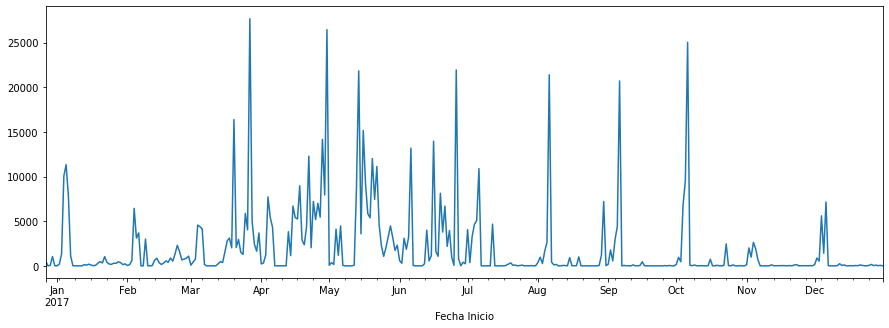

In [20]:
df['Total Hectareas'].loc[:].resample('D').sum().plot(figsize=(15,5))

<AxesSubplot:xlabel='Fecha Inicio'>

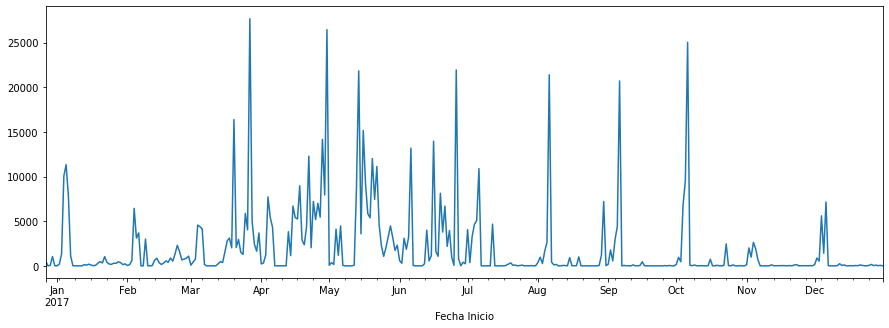

In [21]:
df['Total Hectareas'].loc[:].resample('D').sum().plot(figsize=(15,5))

<div class="alert alert-success">
    
e). Graficar la superficie total de hectáreas afectadas sólo en Yucatán por mes
    
</div> 

In [22]:
df[df['Estado'] == 'Yucatán']

,Número de Incendio,Clave del incendio,Grados,Minutos,Segundos,Grados.1,Minutos.1,Segundos.1,Clave municipio,Estado,...,Tamaño,Deteccion,Llegada,Duracion HMS,Duracion H,Costos MXN,Superficie Salvada,CO2 emitido,CO2 Evito emitir,Region
Fecha Inicio,,,,,,,,,,,,,,,,,,,,,
2017-01-03,14,17-31-0014,21,23,38.50,88,45,51.6,28,Yucatán,...,Mayor a 100 Hectáreas,02:00:00,19:00:00,07:00:00,7.00,54230.0,1630.89,2803.13,47129.90,Sureste
2017-01-03,13,17-31-0013,20,56,57.10,89,19,38.0,93,Yucatán,...,Mayor a 100 Hectáreas,02:00:00,19:00:00,07:00:00,7.00,37830.0,3063.64,5808.54,88533.74,Sureste
2017-01-03,15,17-31-0015,20,51,3.80,90,19,15.9,11,Yucatán,...,0 a 5 Hectáreas,02:00:00,19:00:00,07:00:00,7.00,2300.0,30.48,19.72,300.55,Sureste
2017-01-04,67,17-31-0067,20,33,6.50,88,39,20.0,104,Yucatán,...,Mayor a 100 Hectáreas,00:30:00,00:45:00,06:00:00,6.00,5020.0,3764.77,6935.57,108795.19,Sureste
2017-01-04,61,17-31-0061,20,54,9.10,89,9,56.6,40,Yucatán,...,Mayor a 100 Hectáreas,00:30:00,00:45:00,06:00:00,6.00,7580.0,1600.41,2311.86,46248.97,Sureste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-04,73,17-31-0073,20,51,38.10,87,51,28.6,19,Yucatán,...,6 a 10 Hectáreas,01:30:00,01:45:00,06:00:00,6.00,18480.0,121.94,231.19,3523.73,Sureste
2017-12-03,42,17-31-0042,21,3,31.00,89,14,29.6,52,Yucatán,...,11 a 20 Hectáreas,00:30:00,00:30:00,08:05:00,8.08,3360.0,167.66,778.85,11871.18,Sureste
2017-12-04,57,17-31-0057,21,2,39.80,87,36,14.4,96,Yucatán,...,21 a 50 Hectáreas,01:00:00,01:00:00,04:00:00,4.00,10800.0,579.20,2124.13,41009.52,Sureste


In [23]:
df_yucatan=df[df['Estado'] == 'Yucatán']

In [24]:
#df_yucatan

<AxesSubplot:xlabel='Fecha Inicio'>

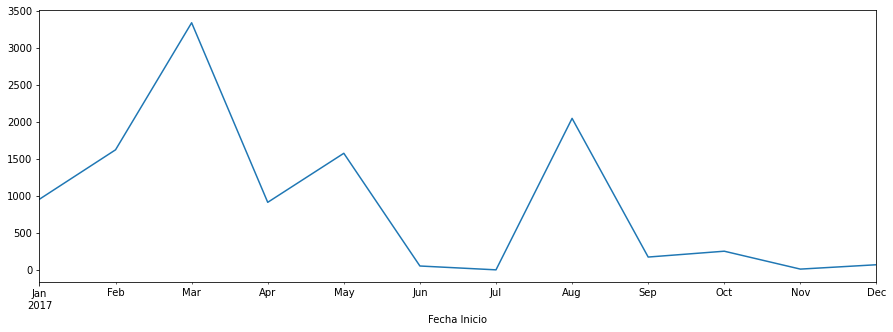

In [25]:
df_yucatan['Total Hectareas'].loc[:].resample('M').sum().plot(figsize=(15,5))

<div class="alert alert-success">
    
f). Graficar la superficie total de hectáreas afectadas por semana sólo en Jalisco para los meses abril, mayo, junio y julio 
    
</div> 

In [26]:
df_jalisco=df[df['Estado'] == 'Jalisco']

In [27]:
df_j4567=df_jalisco[df_jalisco.index.month.isin([4,5,6,7])]

In [28]:
df_j4567.tail()

,Número de Incendio,Clave del incendio,Grados,Minutos,Segundos,Grados.1,Minutos.1,Segundos.1,Clave municipio,Estado,...,Tamaño,Deteccion,Llegada,Duracion HMS,Duracion H,Costos MXN,Superficie Salvada,CO2 emitido,CO2 Evito emitir,Region
Fecha Inicio,,,,,,,,,,,,,,,,,,,,,
2017-07-05,684,17-14-0684,20,24,25.57,104,51,36.12,20,Jalisco,...,51 a 100 Hectáreas,00:10:00,00:15:00,21:40:00,21.67,10491.6,1152.45,2705.62,41239.03,Occidente
2017-07-05,388,17-14-0388,19,47,42.48,104,32,17.68,68,Jalisco,...,Mayor a 100 Hectáreas,01:00:00,22:00:00,04:00:00,4.00,81504.0,16071.93,33032.03,505608.00,Occidente
2017-07-05,528,17-14-0528,19,54,13.90,103,2,53.60,59,Jalisco,...,21 a 50 Hectáreas,00:10:00,00:20:00,18:00:00,18.00,6361.8,569.44,1988.90,30314.86,Occidente
2017-07-06,732,17-14-0732,21,50,36.97,104,10,41.99,19,Jalisco,...,Mayor a 100 Hectáreas,00:45:00,00:40:00,10:25:00,10.42,4478.5,4693.93,11020.00,167966.85,Occidente
2017-07-06,512,17-14-0512,19,59,44.59,103,22,37.92,14,Jalisco,...,11 a 20 Hectáreas,00:25:00,01:55:00,07:45:00,7.75,5576.8,168.58,395.77,6032.32,Occidente


<AxesSubplot:xlabel='Fecha Inicio'>

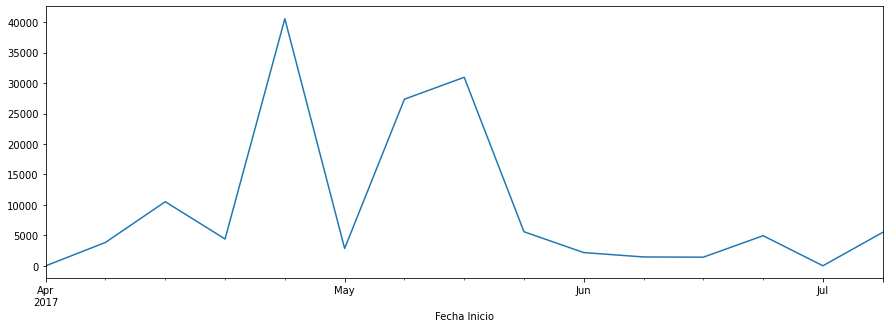

In [29]:
df_j4567['Total Hectareas'].loc[:].resample('W').sum().plot(figsize=(15,5))

# Ejercicio 3: Pacientes confirmados con Covid en México


Fuente: https://datos.covid-19.conacyt.mx/#DownZCSV

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Para el análisis por fechas   </li>
</ul>
</div>

Como veremos a continuacón los datos de fecha se encuentran en las columnas, por lo que será necesario invertir su posición

In [30]:
df= pd.read_csv("datos/Casos_Diarios_Estado_Nacional_Confirmados_20201118.csv")
df.head()

,cve_ent,poblacion,nombre,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,09-11-2020,10-11-2020,11-11-2020,12-11-2020,13-11-2020,14-11-2020,15-11-2020,16-11-2020,17-11-2020,18-11-2020
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,55,29,15,4,0,0,0,0,0,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,111,69,64,45,28,13,6,6,8,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,66,62,53,62,43,25,12,23,6,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,8,5,6,6,13,0,0,2,0,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,7,10,10,7,1,2,0,2,0,0


Conservaremos solo el nombre de la entidad y las columnas de las fechas

In [31]:
df=df.loc[:,'nombre':]
df.head()

,nombre,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,...,09-11-2020,10-11-2020,11-11-2020,12-11-2020,13-11-2020,14-11-2020,15-11-2020,16-11-2020,17-11-2020,18-11-2020
0,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,...,55,29,15,4,0,0,0,0,0,0
1,BAJA CALIFORNIA,0,0,0,0,0,0,0,0,0,...,111,69,64,45,28,13,6,6,8,0
2,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,0,0,...,66,62,53,62,43,25,12,23,6,0
3,CAMPECHE,0,0,0,0,0,0,0,0,0,...,8,5,6,6,13,0,0,2,0,0
4,CHIAPAS,0,0,0,0,0,0,0,0,0,...,7,10,10,7,1,2,0,2,0,0


Llevamos a cabo la operacion Transpuesta, es decir intercambiar filas por columnas

In [32]:
df = df.set_index('nombre').T
df.head()

nombre,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,DURANGO,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
12-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


El resto es ajustar el nombre de nuestra columna que será el indice y configurarla con pd.to_datetime 

In [33]:
df=df.reset_index()
df.head()

nombre,index,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
0,12-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df = df.rename(columns = {'index': 'Fecha'})
df.head()

nombre,Fecha,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
0,12-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format= '%d-%m-%Y')

In [36]:
df = df.set_index('Fecha')

In [37]:
df

nombre,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,DURANGO,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
Fecha,,,,,,,,,,,,,,,,,,,,,
2020-01-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-14,0,13,25,0,2,3,38,61,0,116,...,54,9,0,51,7,5,5,43,39,844
2020-11-15,0,6,12,0,0,1,24,29,4,30,...,14,2,0,28,4,1,4,22,6,365
2020-11-16,0,6,23,2,2,0,14,20,1,38,...,0,5,31,31,0,5,1,13,1,337


In [38]:
df.tail()

nombre,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,DURANGO,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
Fecha,,,,,,,,,,,,,,,,,,,,,
2020-11-14,0,13,25,0,2,3,38,61,0,116,...,54,9,0,51,7,5,5,43,39,844
2020-11-15,0,6,12,0,0,1,24,29,4,30,...,14,2,0,28,4,1,4,22,6,365
2020-11-16,0,6,23,2,2,0,14,20,1,38,...,0,5,31,31,0,5,1,13,1,337
2020-11-17,0,8,6,0,0,0,2,5,1,1,...,0,1,6,14,0,1,0,0,15,92
2020-11-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2


In [39]:
df.columns

Index(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'CAMPECHE',
       'CHIAPAS', 'CHIHUAHUA', 'DISTRITO FEDERAL', 'COAHUILA', 'COLIMA',
       'DURANGO', 'GUANAJUATO', 'GUERRERO', 'HIDALGO', 'JALISCO', 'MEXICO',
       'MICHOACAN', 'MORELOS', 'NAYARIT', 'NUEVO LEON', 'OAXACA', 'PUEBLA',
       'QUERETARO', 'QUINTANA ROO', 'SAN LUIS POTOSI', 'SINALOA', 'SONORA',
       'TABASCO', 'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATAN', 'ZACATECAS',
       'Nacional'],
      dtype='object', name='nombre')

<div class="alert alert-success">
    
a). Graficar el total de pacientes confirmados nivel Nacional por semana, desde el 15 de enero hasta el 14 de noviembre
    
</div> 

<AxesSubplot:xlabel='Fecha'>

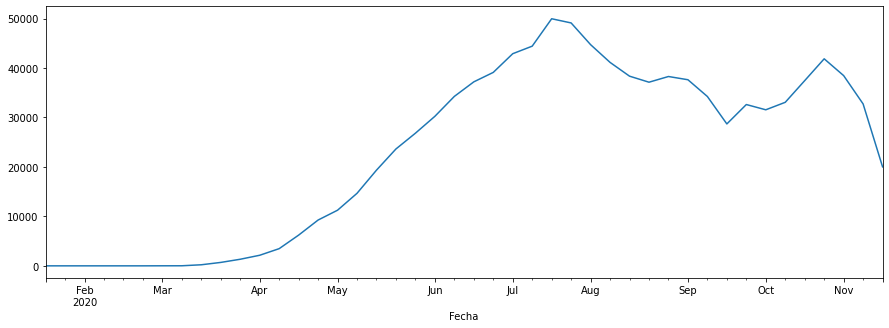

In [40]:
df['Nacional'].loc['2020-01-15':'2020-11-14'].resample('W').sum().plot(figsize=(15,5))

<div class="alert alert-success">
    
b). Graficar el total de pacientes confirmados cada 2 días en Yucatan (en todos los datos)
    
</div> 

<AxesSubplot:xlabel='Fecha'>

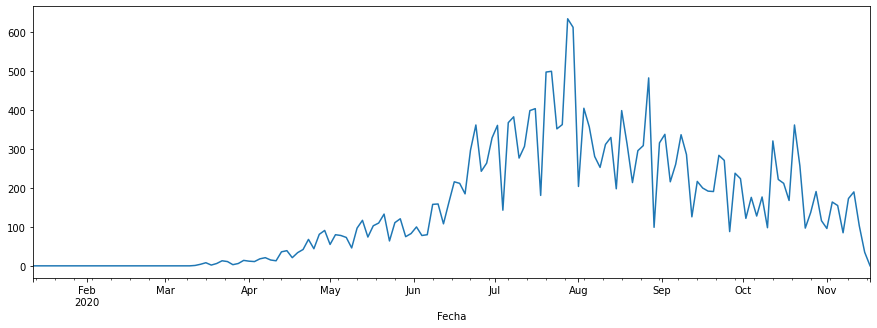

In [41]:
df['YUCATAN'].loc[:].resample('2D').sum().plot(figsize=(15,5))

<div class="alert alert-success">
    
c). Encontrar la semana con más pacientes confirmados en Yucatán
    
</div> 

In [84]:
df.sort_values(['YUCATAN']).index[-1]

Timestamp('2020-07-30 00:00:00')

In [63]:
df[['YUCATAN']].resample('W').sum().sort_values(by='YUCATAN', ascending=False).head(1)

nombre,YUCATAN
Fecha,
2020-08-02,1723


<div class="alert alert-success">
    
d). Encontrar la semana con más pacientes confirmados a nivel Nacional
    
</div>

In [42]:
df['Nacional'].loc[:].resample('W').max()#.index[-1]

Fecha
2020-01-12       0
2020-01-19       1
2020-01-26       0
2020-02-02       1
2020-02-09       0
2020-02-16       1
2020-02-23       1
2020-03-01       5
2020-03-08       4
2020-03-15      61
2020-03-22     148
2020-03-29     247
2020-04-05     367
2020-04-12     590
2020-04-19    1081
2020-04-26    1628
2020-05-03    1822
2020-05-10    2522
2020-05-17    3472
2020-05-24    4029
2020-05-31    4616
2020-06-07    5275
2020-06-14    6149
2020-06-21    6539
2020-06-28    6861
2020-07-05    7570
2020-07-12    7853
2020-07-19    8810
2020-07-26    9075
2020-08-02    8445
2020-08-09    7451
2020-08-16    7159
2020-08-23    6823
2020-08-30    6959
2020-09-06    6992
2020-09-13    6495
2020-09-20    6248
2020-09-27    6170
2020-10-04    6102
2020-10-11    5816
2020-10-18    6891
2020-10-25    7977
2020-11-01    7725
2020-11-08    6995
2020-11-15    4638
2020-11-22     337
Freq: W-SUN, Name: Nacional, dtype: int64

In [43]:
df.sort_values(['Nacional']).index[-1]#.max()

Timestamp('2020-07-20 00:00:00')

In [44]:
df['YUCATAN'].loc[:].resample('W')

In [56]:
#df['Nacional'].resample('W').sum().max()

In [57]:
#df[df['Nacional'].resample('W')].max()

In [58]:
#df['Nacional'].resample('W').sum().sort_values().head()

In [59]:
#df['Nacional'].resample('W').sum().sort_values(by='Nacional', ascending=True)

In [62]:
#df['Nacional'].resample('W').sum().sort_values(ascending=False).head()

In [61]:
df[['Nacional']].resample('W').sum().sort_values(by='Nacional', ascending=False).head(1)

nombre,Nacional
Fecha,
2020-07-19,49963
